In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("/content/MSA_M2022_dl.xlsx")
df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,17.7,26.44,37.86,21640,27440,36820,55000,78740,NaN,NaN
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,37.36,52.92,76.2,37140,53760,77720,110070,158500,NaN,NaN
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,35.15,52.3,77.42,30720,46640,73120,108780,161030,NaN,NaN
3,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,...,44.25,62.83,88.94,55450,66240,92040,130680,185000,NaN,NaN
4,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,...,40.4,61.07,76.85,45380,54090,84020,127030,159850,NaN,NaN


In [3]:
bloomington_df = df[df['AREA_TITLE'] == 'Bloomington, IN'] # creating bloomington df

In [4]:
pd.set_option('display.max_columns', None)
bloomington_df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,PCT_RPT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
14675,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,71720,0,1000,1,NaN,NaN,26.69,55520,0.5,11.47,14.78,21.14,31.06,46.72,23850,30740,43970,64600,97180,NaN,NaN
14676,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,4340,1.1,60.549,0.91,NaN,NaN,53.6,111480,0.8,23.68,30.74,47.32,63.81,92.97,49260,63950,98430,132720,193380,NaN,NaN
14677,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,1150,1.6,16.049,0.7,NaN,NaN,56.68,117900,1.6,19.11,28.84,43.05,71.31,107.54,39750,59990,89540,148330,223680,NaN,NaN
14678,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,detailed,120,5.2,1.626,0.73,NaN,NaN,63.06,131160,1.5,35.46,44.13,58.36,82.3,98.63,73770,91800,121400,171180,205140,NaN,NaN
14679,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,detailed,130,5.4,1.806,0.5,NaN,NaN,60.81,126480,3.3,23.75,33.23,54.03,82,102.11,49400,69130,112380,170560,212390,NaN,NaN


In [5]:
# We can drop PCT_TOTAL, PCT_RPT, HOURLY columns (blanks values for each occupation)
# We could also fill ANNUAL with "FALSE" for missing values

# Dropping the 'PCT_TOTAL', 'PCT_RPT', 'HOURLY' columns
bloomington_df.drop(['PCT_TOTAL', 'PCT_RPT', 'HOURLY'], axis=1, inplace=True)

# Fill missing values in 'ANNUAL' column with "FALSE"
bloomington_df['ANNUAL'].fillna('FALSE', inplace=True)

print(bloomington_df.isnull().sum()) # lets verify the changes

AREA            0
AREA_TITLE      0
AREA_TYPE       0
PRIM_STATE      0
NAICS           0
NAICS_TITLE     0
I_GROUP         0
OWN_CODE        0
OCC_CODE        0
OCC_TITLE       0
O_GROUP         0
TOT_EMP         0
EMP_PRSE        0
JOBS_1000       0
LOC_QUOTIENT    0
H_MEAN          0
A_MEAN          0
MEAN_PRSE       0
H_PCT10         0
H_PCT25         0
H_MEDIAN        0
H_PCT75         0
H_PCT90         0
A_PCT10         0
A_PCT25         0
A_MEDIAN        0
A_PCT75         0
A_PCT90         0
ANNUAL          0
dtype: int64


In [6]:
# Columns to replace * with NaN
wage_columns = [
    'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
    'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]

# Replacing '*' with NaN for the specified columns in the original DataFrame
for column in wage_columns:
    bloomington_df[column] = bloomington_df[column].replace('*', np.nan)

In [7]:
bloomington_df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL
14675,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,71720,0,1000,1,26.69,55520.0,0.5,11.47,14.78,21.14,31.06,46.72,23850.0,30740.0,43970.0,64600,97180,FALSE
14676,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,4340,1.1,60.549,0.91,53.60,111480.0,0.8,23.68,30.74,47.32,63.81,92.97,49260.0,63950.0,98430.0,132720,193380,FALSE
14677,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,1150,1.6,16.049,0.7,56.68,117900.0,1.6,19.11,28.84,43.05,71.31,107.54,39750.0,59990.0,89540.0,148330,223680,FALSE
14678,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,detailed,120,5.2,1.626,0.73,63.06,131160.0,1.5,35.46,44.13,58.36,82.3,98.63,73770.0,91800.0,121400.0,171180,205140,FALSE
14679,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,detailed,130,5.4,1.806,0.5,60.81,126480.0,3.3,23.75,33.23,54.03,82,102.11,49400.0,69130.0,112380.0,170560,212390,FALSE


In [8]:
all_occupations_row = bloomington_df.head(1)
all_occupations_row

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL
14675,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,71720,0,1000,1,26.69,55520.0,0.5,11.47,14.78,21.14,31.06,46.72,23850.0,30740.0,43970.0,64600,97180,FALSE


# Using the Mean

## What are people earning in Bloomington?

## Mean wages:

In [9]:
# Mean hourly and annual wages
mean_hourly_wage = all_occupations_row['H_MEAN'].iloc[0]
mean_annual_wage = all_occupations_row['A_MEAN'].iloc[0]

print(f"Mean Hourly Wage For All Occupations: {mean_hourly_wage}")
print(f"Mean Annual Wage For All Occupations: {mean_annual_wage}")

Mean Hourly Wage For All Occupations: 26.69
Mean Annual Wage For All Occupations: 55520.0


- Mean hourly wage for all occupations is $26.69.

- Mean annual wage for all occupations is $55,520.0.

## How should we define workforce?

Workforce housing is typically aimed at middle-income workers.

A widely used guideline for housing affordability is that housing costs should not exceed 30% of a household's income. This 30% rule can be a good starting point for defining what's affordable for workforce housing based on average wages.

In [10]:
# A common benchmark for affordability is that no more than 30%
# of a household's gross income should be spent on housing
percentage = 0.30

In [11]:
# Mean of median annual wage is $55,520.0.

affordable_annual_housing_cost = mean_annual_wage * percentage  # 30% of annual income
affordable_monthly_housing_cost = affordable_annual_housing_cost / 12

print(f"Affordable Annual Housing Cost: ${affordable_annual_housing_cost:.2f}")
print(f"Affordable Monthly Housing Cost: ${affordable_monthly_housing_cost:.2f}")

Affordable Annual Housing Cost: $16656.00
Affordable Monthly Housing Cost: $1388.00


Based on the 30% affordability threshold and the mean wages in Bloomington, the affordable wage levels are as follows:

- Affordable annual housing cost is $16,656.00

- Affordable monthly housing cost is $1,388.00

## Mean Wages vs Bloomington's AMI

In [12]:
ami_bloomington = 63300   # 2023 Bloomington adjusted AMI

# Calculating affordable costs at 30% housing cost burden
affordable_annual_ami = ami_bloomington * percentage
affordable_monthly_ami = affordable_annual_ami / 12

In [13]:
# Comparing with the AMI-based affordable costs
print(f"Affordable Housing Cost Based on AMI (Annual): ${affordable_annual_ami:.2f}")
print(f"Affordable Housing Cost Based on AMI (Monthly): ${affordable_monthly_ami:.2f}")

print('\n')

print(f"Affordable Housing Cost Based on the Mean Wages (Annual): ${affordable_annual_housing_cost:.2f}")
print(f"Affordable Housing Cost Based on the Mean Wages (Monthly): ${affordable_monthly_housing_cost:.2f}")

Affordable Housing Cost Based on AMI (Annual): $18990.00
Affordable Housing Cost Based on AMI (Monthly): $1582.50


Affordable Housing Cost Based on the Mean Wages (Annual): $16656.00
Affordable Housing Cost Based on the Mean Wages (Monthly): $1388.00


From the above information we conclude that:

- Affordable housing cost based on the mean wages are significantly lower than those calculated using Bloomington's AMI.

<center>Annual calculation: 16,656 (mean wages) vs 18,990 (AMI)</center>

# Using the Median

The median is often considered a better metric than the mean (average) when it comes to analyzing income data for affordable housing due to several reasons:

- Resistance to Skew: The median is less affected by extreme values at either end of the income distribution. High incomes, which are much larger than the typical income, can significantly raise the mean, giving a distorted view of what a "typical" income might be. The median, being the middle value, remains the same regardless of how high or low these extremes are.

- Better Representation of the Middle: The median represents the middle point of the income range, so exactly half the population earns less, and half earns more. It is more reflective of the experience of a typical person in the dataset.

- Housing Affordability: When setting affordability thresholds for housing, using the median income ensures that exactly half of the population can afford housing priced at that level, which aligns with the goal of affordable housing programs to serve the median or below-median earners.

- Policy Design: For policymakers, targeting the median income is practical because it means that any assistance provided will be suitable for at least half the population. In contrast, if the mean were used, and it was skewed by high earners, housing could be priced out of reach for the majority of residents.

- Income Inequality: In areas with significant income inequality, the mean can be much higher than the median, because the incomes of the very rich raise the average. In such cases, using the mean to gauge housing affordability could exclude lower-income earners who might be a significant portion of the population.

## What are people earning in Bloomington?

## Median wages:

The median wage can be particularly insightful when comparing against the cost of living and housing prices in the area. This approach can help in determining if the majority of workers are able to afford living in the region with their current wages.

The median wage is important because it shows what the average person earns. It's like finding the middle point in everyone's wages. This is often a better way to understand what most people are earning, compared to using the average wage.

The average wage can be misleading if a few people earn a lot more or a lot less than everyone else, which can make it seem like people earn more or less than they actually do. The median helps us see the more typical income.

In [14]:
# Calculating the median hourly and annual wages
median_hourly_wage = all_occupations_row['H_MEDIAN'].iloc[0]
median_annual_wage = all_occupations_row['A_MEDIAN'].iloc[0]

print(f"Median Hourly Wage For All Occupations: {median_hourly_wage}")
print(f"Median Annual Wage For All Occupations: {median_annual_wage}")

Median Hourly Wage For All Occupations: 21.14
Median Annual Wage For All Occupations: 43970.0


- Mean hourly wage for all occupations is $21.14.

- Mean annual wage for all occupations is $43,970.0.

## How should we define workforce?

Workforce housing is typically aimed at middle-income workers.

A widely used guideline for housing affordability is that housing costs should not exceed 30% of a household's income. This 30% rule can be a good starting point for defining what's affordable for workforce housing based on average wages.

In [15]:
# A common benchmark for affordability is that no more than 30%
# of a household's gross income should be spent on housing
percentage = 0.30

In [16]:
# Median annual wage is $43,970.0

affordable_annual_housing_cost = median_annual_wage * percentage  # 30% of annual income
affordable_monthly_housing_cost = affordable_annual_housing_cost / 12

print(f"Affordable Annual Housing Cost: ${affordable_annual_housing_cost:.2f}")
print(f"Affordable Monthly Housing Cost: ${affordable_monthly_housing_cost:.2f}")

Affordable Annual Housing Cost: $13191.00
Affordable Monthly Housing Cost: $1099.25


Based on the 30% affordability threshold and the median wages in Bloomington, the affordable wage levels are as follows:

- Affordable annual housing costo is $13,191.00

- Affordable monthly housing cost is $1,099.25

## Median Wages vs Bloomington's AMI

In [17]:
ami_bloomington = 63300   # 2023 Bloomington adjusted AMI

# Calculating affordable costs at 30% housing cost burden
affordable_annual_ami = ami_bloomington * percentage
affordable_monthly_ami = affordable_annual_ami / 12

In [18]:
# Comparing with the AMI-based affordable costs
print(f"Affordable Housing Cost Based on AMI (Annual): ${affordable_annual_ami:.2f}")
print(f"Affordable Housing Cost Based on AMI (Monthly): ${affordable_monthly_ami:.2f}")

print('\n')

print(f"Affordable Housing Cost Based on the Median Wages (Annual): ${affordable_annual_housing_cost:.2f}")
print(f"Affordable Housing Cost Based on the Median Wages (Monthly): ${affordable_monthly_housing_cost:.2f}")

Affordable Housing Cost Based on AMI (Annual): $18990.00
Affordable Housing Cost Based on AMI (Monthly): $1582.50


Affordable Housing Cost Based on the Median Wages (Annual): $13191.00
Affordable Housing Cost Based on the Median Wages (Monthly): $1099.25


From the above information we conclude that:

- Affordable housing cost based on the median wages are significantly lower than those calculated using Bloomington's AMI.

<center>Annual calculation: 13,191 (median wages) vs 18,990 (AMI)</center>

- The AMI may overestimate what is affordable for a median-income household.

- The average or middle-income household in Bloomington, as reflected by the median wages, would be able to afford less expensive housing compared to what is determined by the AMI.

- Results indicate that relying solely on AMI to determine affordable housing costs might not accurately reflect the reality for the average worker in Bloomington. The median wage-based calculation provides a more conservative and potentially more realistic estimate of what is affordable for the typical worker.

- The fact that the median wage-based affordability is lower than the AMI-based affordability might also reflect broader economic issues, such as income inequality or a skewed wage distribution, where a significant portion of the population earns less than the average income.

- In such a scenario, a smaller number of high-income earners are pushing the AMI higher, which doesn't accurately reflect what the majority can afford.

- A skewed wage distribution occurs when more people earn either significantly less or significantly more than the average income, leading to a distortion in average income figures. In Bloomington, if many residents earn substantially less than a few high earners, this can push up the AMI, making it seem like the average income is higher than what most people actually earn.

- Relying solely on AMI might lead to developing housing solutions that are out of reach for a large segment of the population, particularly lower-income households.

- Student population can impact median wage calculations and the overall profile of the city.

## Wage Spread

In [ ]:
# Hourly wage percentiles from "all_occupations_rows"

#hourly_wages = [11.47, 14.78, 21.14, 31.06, 46.72]  # H_PCT10, H_PCT25, H_MEDIAN, H_PCT75, H_PCT90


#plt.figure(figsize=(8, 6))
#sns.boxplot(data=[hourly_wages])
#plt.title('Distribution of Hourly Wages for All Occupations in Bloomington, IN')
#plt.xlabel('Wage Category')
#plt.ylabel('Hourly Wage ($)')
#plt.xticks([0], ['All Occupations'])
#plt.show()

The annual wages at different percentiles:
- 10th Percentile Annual Wage: $23,850 (A_PCT10)

- 25th Percentile Annual Wage: $30,740 (A_PCT25)

- Median Annual Wage: $43,970 (A_MEDIAN)

- 75th Percentile Annual Wage: $64,600 (A_PCT75)

- 90th Percentile Annual Wage: $97,180 (A_PCT90)

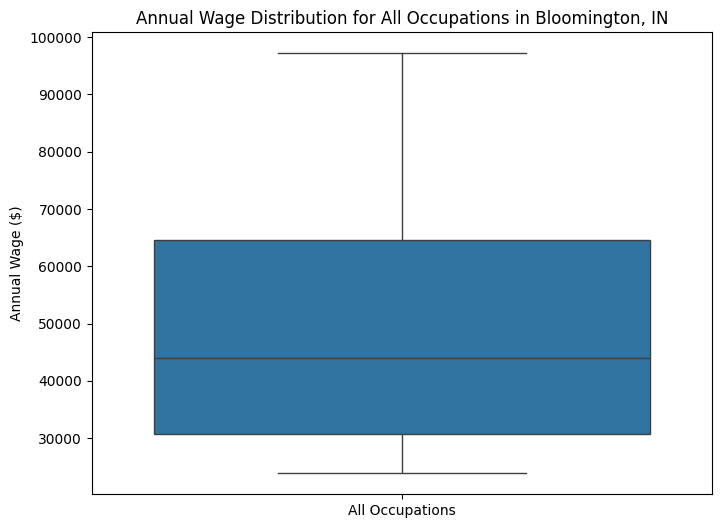

In [26]:
# Annual wage percentiles from "all_occupations_rows"

annual_wages = [23850.0, 30740.0, 43970.0, 64600, 97180]  # A_PCT10, A_PCT25, A_MEDIAN, A_PCT75, A_PCT90


plt.figure(figsize=(8, 6))
sns.boxplot(data=[annual_wages])
plt.title('Annual Wage Distribution for All Occupations in Bloomington, IN')
plt.ylabel('Annual Wage ($)')
plt.xticks([0], ['All Occupations'])
plt.show()

Given these values, a boxplot would visualize the distribution of annual wages, with the median value (the central line within the box) at 43,970, showing that half the workers earn more than this amount and half earn less. The box itself would span from 30,740 to 64,600, representing the interquartile range, or the middle 50% of wages.

Regaridng whisker:
- Lower Whisker: Extends to the 10th percentile wage, which is 23,850 in our data. This means the lower whisker shows the bottom end of the wage range, indicating that only 10% of workers earn less than this amount.

- Upper Whisker: Reaches up to the 90th percentile wage, at 97,180. This means the upper whisker shows the top end of the wage range, indicating that 90% of workers earn less than this amount, and only 10% earn more.

## Bloomington's AMI vs Percentiles

- Median Wage vs. AMI: The median annual wage in Bloomington, IN is 43,970, which is indeed below the AMI of 63,300. This means more than half of the workers earn less than the AMI, which could suggest that many might find housing priced at the AMI unaffordable, according to the 30% rule for housing costs.

- 10th and 25th Percentiles: The 10th percentile annual wage is 23,850, and the 25th percentile is 30,740. These figures are considerably lower than both the median and the AMI, highlighting that a significant portion of the workforce earns substantially less than the average income.

- 75th Percentile: The 75th percentile wage is 64,600, which is just above the AMI. Therefore, only the top 25% of earners have wages around or above the average income for the area.

- 90th Percentile: The wage at the 90th percentile is 97,180, which is much higher than both the median and the AMI, indicating a significant income disparity within the workforce.

# Analyzing Location Quotient Using Mean and Median Wages

By understanding which occupations have a higher concentration in Bloomington compared to the national average, the city can gauge the housing needs of these workers. For example, if there's a high LQ for service industry roles often filled by students and part-time workers, it may indicate a need for more affordable studio or one-bedroom apartments.

For our affordable housing project, especially in a college town setting like Bloomington, we would want to look for occupations with:

- High LOC_QUOTIENTs: Indicating a significant presence in the local economy, possibly driven by the university or related industries.

- Lower Mean Wages: Signaling that these workers may struggle with housing affordability.

We could use the following method:

- Using the overall mean wage casts a wider net, possibly including more middle-income workers who might also struggle with housing affordability.

In [19]:
quotient_df = bloomington_df.drop(bloomington_df.index[0])
quotient_df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL
14676,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,4340,1.1,60.549,0.91,53.60,111480.0,0.8,23.68,30.74,47.32,63.81,92.97,49260.0,63950.0,98430.0,132720,193380,FALSE
14677,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,1150,1.6,16.049,0.7,56.68,117900.0,1.6,19.11,28.84,43.05,71.31,107.54,39750.0,59990.0,89540.0,148330,223680,FALSE
14678,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,detailed,120,5.2,1.626,0.73,63.06,131160.0,1.5,35.46,44.13,58.36,82.3,98.63,73770.0,91800.0,121400.0,171180,205140,FALSE
14679,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,detailed,130,5.4,1.806,0.5,60.81,126480.0,3.3,23.75,33.23,54.03,82,102.11,49400.0,69130.0,112380.0,170560,212390,FALSE
14680,14020,"Bloomington, IN",4,IN,0,Cross-industry,cross-industry,1235,11-2032,Public Relations Managers,detailed,170,0.6,2.404,5.53,58.02,120690.0,0.8,38.57,47.32,49.78,62.93,81.71,80230.0,98430.0,103540.0,130890,169960,FALSE


In [25]:
unique_loc_quotient = quotient_df['LOC_QUOTIENT'].unique()
print(unique_loc_quotient)

[0.91 0.7 0.73 0.5 5.53 0.97 1.12 0.82 1.31 0.46 1.02 0.83 0.64 1.38 0.76
 1.03 0.8 1.75 0.61 0.31 0.67 0.74 0.53 1.4 0.79 0.92 0.57 0.59 0.52 1.43
 1.04 0.75 0.3 0.6 1.08 0.47 0.4 0.51 2.98 1.68 1.5 1.47 0.94 2.07 1.01
 4.83 0.33 2.01 0.44 1.39 1.53 4.4 2.17 4.15 3.21 2.6 1.28 3.58 1.79 1.62
 3.46 1.18 0.93 0.89 0.88 1.22 1.17 0.78 48.23 0.62 0.41 0.99 10.37 1.71
 1.2 0.69 2.13 2.06 1.35 6.47 0.66 1.1 0.87 0.68 0.84 1.34 1.3 1.19 0.95
 2.54 1.74 0.71 0.81 1.49 0.72 1.32 0.34 0.98 1.36 1.48 1.51 1.37 1.14
 1.57 1.05 1.87 0.96 1.13 1.06 0.86 1.16 0.85 0.28 0.48 1.15 0.65 1.25
 1.26 2.58 0.55 0.77 0.9 1.23 0.35 0.58 1.21 0.18 1.27 43.34 1.59 1.29
 0.45 1.56 1.42 6.05 3.97 1.84 1.07 2.53 4.29 1.88 2.72 2.63 1.44 3.55
 1.98 1]


In [41]:
min(unique_loc_quotient)

0.18

In [42]:
max(unique_loc_quotient)

48.23

In [39]:
#mean_quotient = quotient_df['A_MEAN'].unique()
#print(mean_quotient)

## Method: A_MEAN of $55,520 (all occupations)

In [37]:
#low_wage_threshold = quotient_df['A_MEAN'].quantile(0.25) occupations where wages are in the lower 25% of all wages

More inclusive approach: Occupations earning less than this amount are considered for affordable housing needs.

In [20]:
low_wage_threshold = 55520 # A_MEAN for all occupations

# Filter the DataFrame for LOC_QUOTIENT greater than 1 (high concentration) and A_MEAN below the low wage threshold
high_lq_low_wage_jobs = quotient_df[(quotient_df['LOC_QUOTIENT'] > 1) &
                                    (quotient_df['A_MEAN'] < low_wage_threshold)]

# Sort occupations by LOC_QUOTIENT to prioritize those with the highest local concentration
high_lq_low_wage_jobs_sorted = high_lq_low_wage_jobs.sort_values('LOC_QUOTIENT', ascending=False)


loc_df = high_lq_low_wage_jobs_sorted[['OCC_CODE', 'OCC_TITLE', 'TOT_EMP', 'LOC_QUOTIENT', 'A_MEAN']]
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows') -> to reset original

loc_df

,OCC_CODE,OCC_TITLE,TOT_EMP,LOC_QUOTIENT,A_MEAN
14906,47-5051,"Rock Splitters, Quarry",80,43.34,48130.0
14781,27-3092,Court Reporters and Simultaneous Captioners,40,6.47,49130.0
14927,51-4041,Machinists,930,6.05,50050.0
14739,17-3026,Industrial Engineering Technologists and Techn...,130,4.15,52540.0
14928,51-4072,"Molding, Coremaking, and Casting Machine Sette...",320,3.97,45260.0
14941,51-9195,"Molders, Shapers, and Casters, Except Metal an...",70,3.55,41720.0
14938,51-9061,"Inspectors, Testers, Sorters, Samplers, and We...",770,2.72,52720.0
14939,51-9111,Packaging and Filling Machine Operators and Te...,470,2.63,41970.0
14871,43-4121,"Library Assistants, Clerical",100,2.58,38310.0
14798,29-2053,Psychiatric Technicians,120,2.54,35100.0


These workers might find it particularly challenging to afford housing in the area:

-  Occupations with mean wages significantly lower than $55,520 (A_MEAN for all occupations) might struggle to afford average housing costs in Bloomington.

- These roles, such as Rock Splitters, Quarry Workers, Court Reporters, Machinists, and various technicians and service workers, are likely to represent segments of the workforce that may find it challenging to afford average housing in the area.

- This diversity implies that affordable housing needs are not limited to traditionally low-wage sectors but extend to various parts of the workforce.

- The variety of occupations suggests that different types of housing might be needed. For example, some workers might need family housing, while others might be more suited for smaller, individual units.

- The prevalence of service and food-related occupations with high LOC_QUOTIENTs could be reflective of the college town environment, where there's a demand for these types of jobs. Student workers might be filling many of these roles.

In [21]:
loc_df.to_csv('location_quotient_mean.csv', index=False) # above results to csv

In [ ]:
# Plotting
#plt.figure(figsize=(10, 20))
#plt.barh(loc_df['OCC_TITLE'], loc_df['LOC_QUOTIENT'])  # Creating a horizontal bar graph

#plt.xlabel('Location Quotient')
#plt.ylabel('Occupation')
#plt.title('Location Quotient by Occupation')


#plt.yticks(rotation=45)
#plt.show()

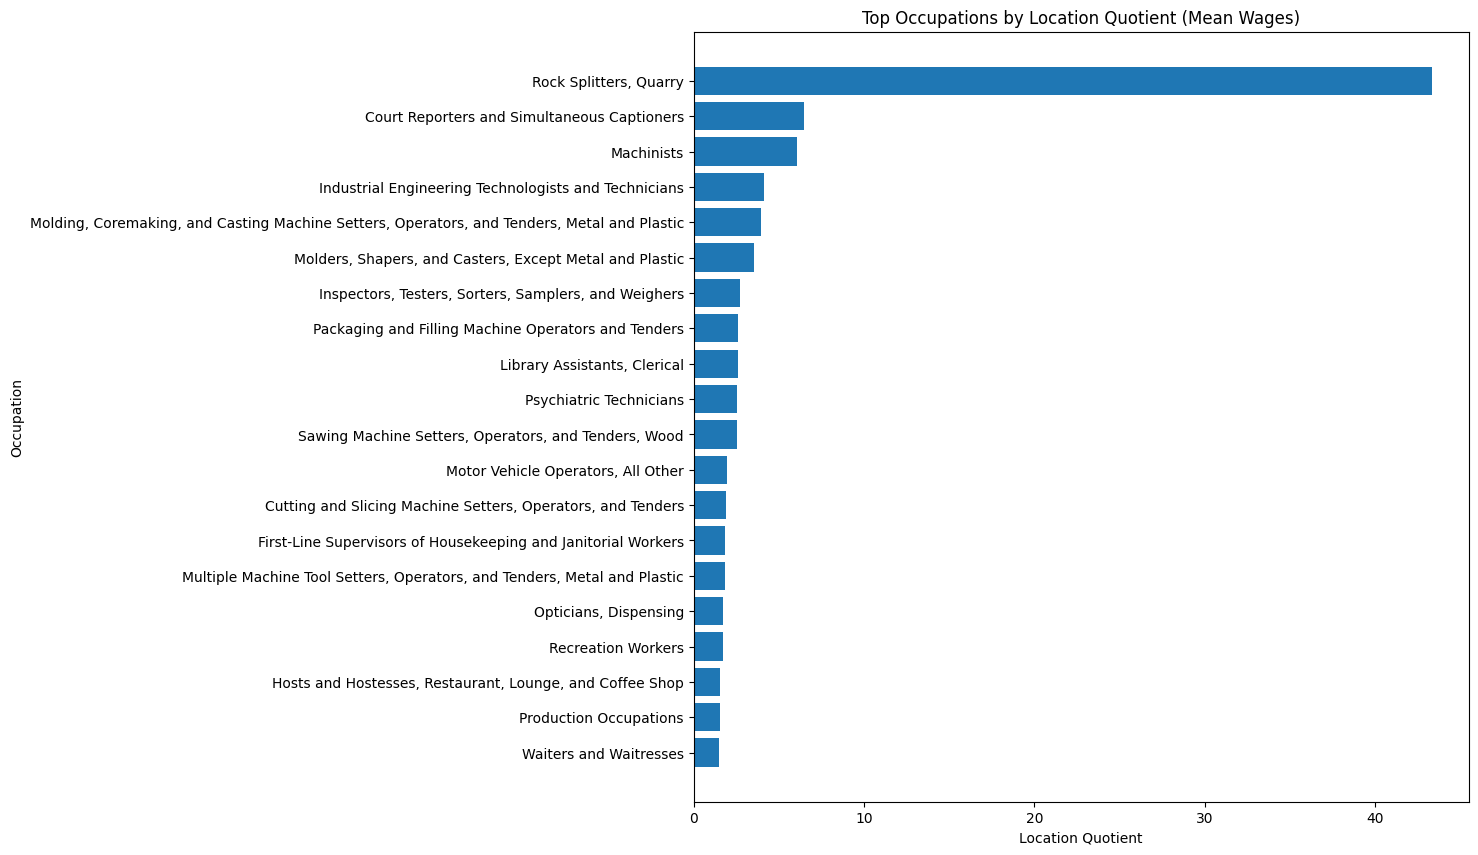

In [22]:
# Ensuring LOC_QUOTIENT is numeric
loc_df['LOC_QUOTIENT'] = pd.to_numeric(loc_df['LOC_QUOTIENT'], errors='coerce')

# Sorting by LOC_QUOTIENT for the top values
loc_df_sorted = loc_df.sort_values('LOC_QUOTIENT', ascending=False)

# Select the top N entries for the plot
top_n = 20
loc_df_top_n = loc_df_sorted.head(top_n)

# Plotting
plt.figure(figsize=(10, 10))
plt.barh(loc_df_top_n['OCC_TITLE'], loc_df_top_n['LOC_QUOTIENT'])
plt.xlabel('Location Quotient')
plt.ylabel('Occupation')
plt.title('Top Occupations by Location Quotient (Mean Wages)')
plt.gca().invert_yaxis()  # Inverting the y-axis to have the highest values at the top
plt.show()

In [23]:
csv_file_path_mean = '/content/location_quotient_mean.csv'

# Read the CSV file into a pandas DataFrame
df_locq_mean = pd.read_csv(csv_file_path_mean)

# Replace 'your_file.xlsx' with the desired Excel file path
excel_file_path_mean = 'location_quotient_mean.xlsx'

# Write the DataFrame to an Excel file
df_locq_mean.to_excel(excel_file_path_mean, index=False)

## Method: A_MEDIAN of $43,970 (all occupations)

In [24]:
low_wage_threshold = 43970 # A_MEDIAN for all occupations

# Filter the DataFrame for LOC_QUOTIENT greater than 1 (high concentration) and A_MEAN below the low wage threshold
high_lq_low_wage_jobs = quotient_df[(quotient_df['LOC_QUOTIENT'] > 1) &
                                    (quotient_df['A_MEDIAN'] < low_wage_threshold)]

# Sort occupations by LOC_QUOTIENT to prioritize those with the highest local concentration
high_lq_low_wage_jobs_sorted = high_lq_low_wage_jobs.sort_values('LOC_QUOTIENT', ascending=False)


loc_df_median = high_lq_low_wage_jobs_sorted[['OCC_CODE', 'OCC_TITLE', 'TOT_EMP', 'LOC_QUOTIENT', 'A_MEDIAN']]
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows') -> to reset original

loc_df_median

,OCC_CODE,OCC_TITLE,TOT_EMP,LOC_QUOTIENT,A_MEDIAN
14928,51-4072,"Molding, Coremaking, and Casting Machine Sette...",320,3.97,36180.0
14941,51-9195,"Molders, Shapers, and Casters, Except Metal an...",70,3.55,38020.0
14939,51-9111,Packaging and Filling Machine Operators and Te...,470,2.63,36910.0
14871,43-4121,"Library Assistants, Clerical",100,2.58,39730.0
14798,29-2053,Psychiatric Technicians,120,2.54,35270.0
14933,51-7041,"Sawing Machine Setters, Operators, and Tenders...",60,2.53,36990.0
14937,51-9032,"Cutting and Slicing Machine Setters, Operators...",50,1.88,39320.0
14929,51-4081,"Multiple Machine Tool Setters, Operators, and ...",120,1.84,36460.0
14801,29-2081,"Opticians, Dispensing",60,1.74,35770.0
14845,39-9032,Recreation Workers,220,1.71,28110.0


In [26]:
loc_df_median.to_csv('location_quotient_median.csv', index=False) # above results to csv

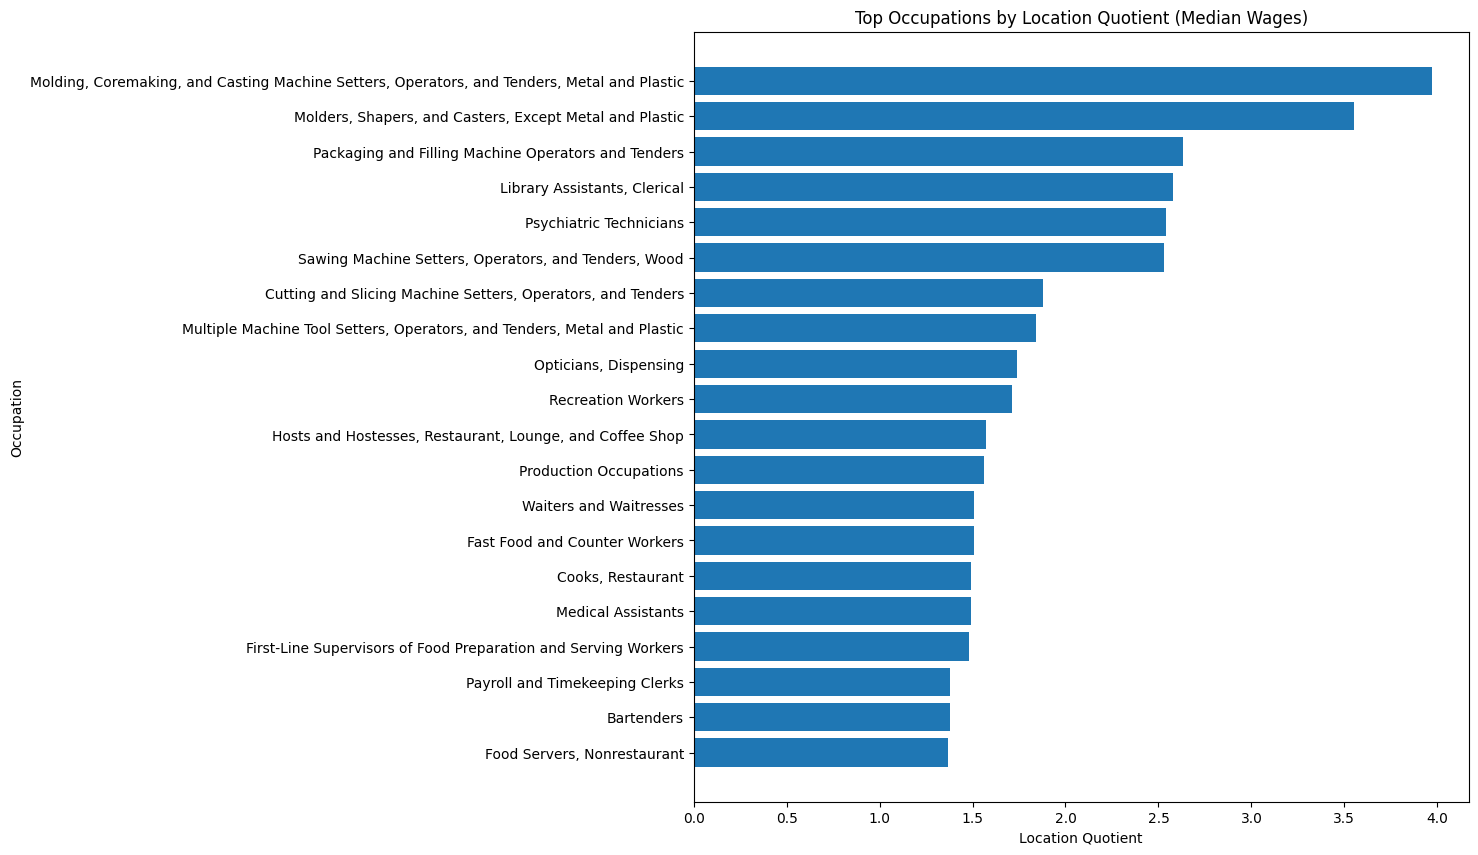

In [27]:
# Ensuring LOC_QUOTIENT is numeric
loc_df_median['LOC_QUOTIENT'] = pd.to_numeric(loc_df_median['LOC_QUOTIENT'], errors='coerce')

# Sorting by LOC_QUOTIENT for the top values
loc_df_sorted_median = loc_df_median.sort_values('LOC_QUOTIENT', ascending=False)

# Select the top N entries for the plot
top_n = 20
loc_df_top_n_median = loc_df_sorted_median.head(top_n)

# Plotting
plt.figure(figsize=(10, 10))
plt.barh(loc_df_top_n_median['OCC_TITLE'], loc_df_top_n_median['LOC_QUOTIENT'])
plt.xlabel('Location Quotient')
plt.ylabel('Occupation')
plt.title('Top Occupations by Location Quotient (Median Wages)')
plt.gca().invert_yaxis()  # Inverting the y-axis to have the highest values at the top
plt.show()

In [28]:
csv_file_path_median = '/content/location_quotient_median.csv'

# Read the CSV file into a pandas DataFrame
df_locq_median = pd.read_csv(csv_file_path_median)

# Replace 'your_file.xlsx' with the desired Excel file path
excel_file_path_median = 'location_quotient_median.xlsx'

# Write the DataFrame to an Excel file
df_locq_median.to_excel(excel_file_path_median, index=False)